In [1]:
import pandas as pd
from tcrdist.repertoire import TCRrep
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
pd.set_option('display.max_columns', None)
data=pd.read_csv('./vdjdb.txt',sep='\t', header=0)

data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [2]:
columns_to_drop = ['reference.id', 'method', 'meta','cdr3fix','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp','mhc.a','mhc.b','antigen.gene']
data.drop(columns=columns_to_drop, inplace=True)
data=data.dropna()
data.head()


,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.class,antigen.epitope,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2


In [3]:
data_human = data[data['species'] == 'HomoSapiens']
data_mouse = data[data['species'] == 'MusMusculus']
data_monkey = data[data['species'] == 'MacacaMulatta']
df=data_human
# # Filter data for alpha chain and beta chain
data_alpha = df[df['gene'] == 'TRA'].copy()
data_beta = df[df['gene'] == 'TRB'].copy()
# Rename data columns to match TCRrep's expected format
data_alpha.rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene', 'antigen.epitope': 'epitope'}, inplace=True)
data_beta.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene', 'antigen.epitope': 'epitope'}, inplace=True)
data_alpha.to_csv('human_alpha.csv')
data_beta.to_csv('human_beta.csv')

In [4]:
# Merge by complex.id, assuming that each complex.id corresponds to a pair of alpha and beta chains
# Make sure complex.id is not equal to 0
data_alpha = data_alpha[data_alpha['complex.id'] != 0]
data_beta = data_beta[data_beta['complex.id'] != 0]
# Merge alpha and beta chain data
common_columns = ['species', 'epitope','antigen.species','mhc.class','vdjdb.score']
data_beta_reduced = data_beta.drop(common_columns, axis=1)
data_combined = pd.merge(data_alpha,data_beta_reduced, on='complex.id' )
data_beta.to_csv('human_combined.csv')

In [5]:
data_combined 

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species,mhc.class,epitope,antigen.species,vdjdb.score,gene_y,cdr3_b_aa,v_b_gene,j_b_gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,MHCI,FLKEKGGL,HIV-1,2,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,MHCI,FLKEQGGL,HIV-1,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,MHCI,FLKEQGGL,HIV-1,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27573,30590,TRA,CMDEGGSNYKLTF,TRAV26-1*01,TRAJ53*01,HomoSapiens,MHCII,PQPELPYPQPQL,Wheat,0,TRB,CASSVRSTDTQYF,TRBV7-2*01,TRBJ2-3*01
27574,30591,TRA,CSLYNNNDMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,MHCII,PQPELPYPQPQL,Wheat,0,TRB,CASSLRYTDTQYF,TRBV7-2*01,TRBJ2-3*01
27575,30592,TRA,CALSTDSWGKLQF,TRAV6*01,TRAJ24*01,HomoSapiens,MHCII,PQQPFPQPEQPFP,Wheat,0,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01
27576,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,MHCII,PQQPFPQPEQPFP,Wheat,2,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01


In [6]:
df=data_combined 
n_orig = df.shape[0]
print(f'The dataset contains {df.shape[0]} TCRs for {len(df["epitope"].unique())} different epitopes. The amount of TCRs per epitope:\n')
df['epitope'].value_counts()

The dataset contains 27578 TCRs for 889 different epitopes. The amount of TCRs per epitope:



epitope
KLGGALQAK          13695
GILGFVFTL           2159
AVFDRKSDAK          1730
RAKFKQLL            1226
IVTDFSVIK            724
                   ...  
GLNDNLLEI              1
AMMFTSDLA              1
IVDTVSALV              1
GQVELGGGNAVEVCK        1
TLGVLVPHV              1
Name: count, Length: 889, dtype: int64

In [7]:
#Drop duplicate TCRs for each epitope separately
drop_dup_cols=['cdr3_a_aa', 'v_a_gene', 'j_a_gene','cdr3_b_aa', 'v_b_gene', 'j_b_gene','epitope']
df = df.drop_duplicates(subset=drop_dup_cols, keep='first').copy()
df.reset_index(drop=True, inplace=True)
print(f'Dropped {n_orig - df.shape[0]} duplicate TCRs by columns {drop_dup_cols}.')
print(f'The new amount of TCRs per epitope:\n')
df['epitope'].value_counts()

Dropped 725 duplicate TCRs by columns ['cdr3_a_aa', 'v_a_gene', 'j_a_gene', 'cdr3_b_aa', 'v_b_gene', 'j_b_gene', 'epitope'].
The new amount of TCRs per epitope:



epitope
KLGGALQAK     13666
GILGFVFTL      1908
AVFDRKSDAK     1723
RAKFKQLL       1212
IVTDFSVIK       713
              ...  
FVDGVPFVV         1
RLSFKELLV         1
KLLKSIAAT         1
FLYENAFLP         1
VLDLFQGQL         1
Name: count, Length: 889, dtype: int64

In [8]:
#Drop epitopes with less than 60 TCRs
peptide_counts = df['epitope'].value_counts()
peptide_list = peptide_counts[peptide_counts >=60].index
df = df[df['epitope'].isin(peptide_list)]
df.reset_index(drop=True, inplace=True)

print(f'The new amount of TCRs per epitope, after dropping epitopes with less than 60 TCRs:\n')
df['epitope'].value_counts()


The new amount of TCRs per epitope, after dropping epitopes with less than 60 TCRs:



epitope
KLGGALQAK         13666
GILGFVFTL          1908
AVFDRKSDAK         1723
RAKFKQLL           1212
IVTDFSVIK           713
YLQPRTFLL           435
RLRAEAQVK           422
TFEYVSQPFLMDLE      401
NLVPMVATV           391
ELAGIGILTV          388
TTDPSFLGRY          384
SPRWYFYYL           365
GLCTLVAML           359
LLWNGPMAV           239
CINGVCWTV           231
ATDALMTGF           128
QYIKWPWYI           125
LTDEMIAQY           125
KSKRTPMGF           117
KTFPPTEPK           117
DATYQRTRALVR         92
NQKLIANQF            71
RAQAPPPSW            63
TPRVTGGGAM           62
HPVTKYIM             60
Name: count, dtype: int64

In [9]:
df.to_csv('human_combined.csv')

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [11]:
new_data=pd.read_csv('human_combined.csv')
score_distribution = pd.pivot_table(new_data, index='epitope', columns='vdjdb.score', aggfunc='size', fill_value=0)
print(score_distribution)

vdjdb.score         0    1   2    3
epitope                            
ATDALMTGF         127    1   0    0
AVFDRKSDAK       1723    0   0    0
CINGVCWTV         210   21   0    0
DATYQRTRALVR       72   20   0    0
ELAGIGILTV        367    1  13    7
GILGFVFTL        1750  147   0   11
GLCTLVAML         308   38  12    1
HPVTKYIM           59    1   0    0
IVTDFSVIK         710    3   0    0
KLGGALQAK       13665    1   0    0
KSKRTPMGF         116    1   0    0
KTFPPTEPK         115    2   0    0
LLWNGPMAV         239    0   0    0
LTDEMIAQY         125    0   0    0
NLVPMVATV         110   57  31  193
NQKLIANQF          71    0   0    0
QYIKWPWYI          77   47   1    0
RAKFKQLL         1210    2   0    0
RAQAPPPSW          61    2   0    0
RLRAEAQVK         422    0   0    0
SPRWYFYYL         345   12   8    0
TFEYVSQPFLMDLE    315   86   0    0
TPRVTGGGAM         53    2   5    2
TTDPSFLGRY        384    0   0    0
YLQPRTFLL         382   50   1    2


In [12]:
epitopes_to_remove=['KLGGALQAK','LLWNGPMAV ','LTDEMIAQY','AVFDRKSDAK','MEVTPSGTWL','NQKLIANQF','RLRAEAQVK', 'TTDPSFLGRY','LLWNGPMAV']
filtered_data = new_data[~new_data['epitope'].isin(epitopes_to_remove)]
score_distribution = pd.pivot_table(filtered_data, index='epitope', columns='vdjdb.score', aggfunc='size', fill_value=0)
print(score_distribution)

vdjdb.score        0    1   2    3
epitope                           
ATDALMTGF        127    1   0    0
CINGVCWTV        210   21   0    0
DATYQRTRALVR      72   20   0    0
ELAGIGILTV       367    1  13    7
GILGFVFTL       1750  147   0   11
GLCTLVAML        308   38  12    1
HPVTKYIM          59    1   0    0
IVTDFSVIK        710    3   0    0
KSKRTPMGF        116    1   0    0
KTFPPTEPK        115    2   0    0
NLVPMVATV        110   57  31  193
QYIKWPWYI         77   47   1    0
RAKFKQLL        1210    2   0    0
RAQAPPPSW         61    2   0    0
SPRWYFYYL        345   12   8    0
TFEYVSQPFLMDLE   315   86   0    0
TPRVTGGGAM        53    2   5    2
YLQPRTFLL        382   50   1    2


In [13]:
filtered_data

,Unnamed: 0,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species,mhc.class,epitope,antigen.species,vdjdb.score,gene_y,cdr3_b_aa,v_b_gene,j_b_gene
0,0,14,TRA,CAYTVLGNEKLTF,TRAV38-1*01,TRAJ48*01,HomoSapiens,MHCI,ELAGIGILTV,HomoSapiens,0,TRB,CASSFTPYNEQFF,TRBV28*01,TRBJ2-1*01
1,1,15,TRA,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HomoSapiens,MHCI,ELAGIGILTV,HomoSapiens,1,TRB,CASSPQGLGTEAFF,TRBV28*01,TRBJ1-1*01
2,2,16,TRA,CAVSFGNEKLTF,TRAV12-2*01,TRAJ48*01,HomoSapiens,MHCI,ELAGIGILTV,HomoSapiens,0,TRB,CAEGQGFVGQPQHF,TRBV28*01,TRBJ1-5*01
3,3,17,TRA,CAVTHYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HomoSapiens,MHCI,ELAGIGILTV,HomoSapiens,0,TRB,CASLRSAVWADTQYF,TRBV28*01,TRBJ2-3*01
4,4,18,TRA,CAGGGGGADGLTF,TRAV12-2*01,TRAJ45*01,HomoSapiens,MHCI,ELAGIGILTV,HomoSapiens,0,TRB,CASTLTGLGQPQHF,TRBV28*01,TRBJ1-5*01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,23792,30537,TRA,CAGQLYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,MHCII,TFEYVSQPFLMDLE,SARS-CoV-2,0,TRB,CASSYRQGQPQHF,TRBV6-2*01,TRBJ1-5*01
23793,23793,30538,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,MHCII,TFEYVSQPFLMDLE,SARS-CoV-2,0,TRB,CASRNRQQTLYGYTF,TRBV6-6*01,TRBJ1-2*01
23794,23794,30539,TRA,CAGLNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,MHCII,TFEYVSQPFLMDLE,SARS-CoV-2,0,TRB,CASSWRQGGSIRESYTF,TRBV5-5*01,TRBJ1-2*01
23795,23795,30540,TRA,CAALNYGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,MHCII,TFEYVSQPFLMDLE,SARS-CoV-2,0,TRB,CASSDRGTGLNGYTF,TRBV6-4*01,TRBJ1-2*01


In [14]:
tr = TCRrep(cell_df=filtered_data,
            organism='human', 
            chains=['alpha', 'beta'],
            deduplicate=True)
X = pd.DataFrame(tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa)

D:\conda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\conda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
D:\conda\Lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1


In [15]:
Y = tr.clone_df['epitope'].copy()

In [16]:
# Make sure X and Y are valid
assert X.shape[0] == X.shape[1], f'assert X shape is nXn: {X.shape[0]} == {X.shape[1]} ?'
#assert X.shape[0] == df.shape[0], f'assert X dimension equals df dimension: {X.shape[0]} == {df.shape[0]} ?'
assert X.shape[0] == Y.shape[0],  f'assert Y length = n: {X.shape[0]} == {Y.shape[0]} ?'

X.index = list(X.index) # change from range to int if needed
Y.index = list(Y.index) # change from range to int if needed
assert (X.index.equals(Y.index)), f'assert X and Y indices are equal' 

In [17]:
# dfs for storing metrics 
metrics_cv_df = pd.DataFrame(columns=['AUC', 'Accuracy', 'Recall', 'Precision'])
auc_cv_df = pd.DataFrame(columns=Y.unique())
recall_cv_df = pd.DataFrame(columns=Y.unique())
precision_cv_df = pd.DataFrame(columns=Y.unique())

# df for storing predictions (for confusion matrix)
preds_df = pd.DataFrame(columns=['y_true', 'y_pred'], index=Y.index)

In [18]:
# Get CV folds
k_cv=5
k_neighbours=5
metrics = []
auc=[]
recall=[]
precision=[]
kfolds = StratifiedKFold(n_splits=k_cv, shuffle=True, random_state=42)
kfolds.get_n_splits(X)

# perform CV
for train_ind, test_ind in kfolds.split(X, Y):
    # split data
    X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
    Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]

    # train model
    model = KNeighborsClassifier(n_neighbors=k_neighbours, metric='precomputed', weights='distance') 
    model.fit(X_train, Y_train.ravel())

    # get predictions
    preds_labels = model.predict(X_test)
    preds_prob = model.predict_proba(X_test)

    # store in df
    preds_df.loc[Y_test.index, 'y_true'] = Y_test.loc[Y_test.index].values
    preds_df.loc[Y_test.index, 'y_pred'] = preds_labels

    ###--- calculate performance metrics

    # calculate & store average metrics
    Y_test_matrix = OneHotEncoder(categories=[model.classes_]).fit_transform(Y_test.values.reshape(-1, 1)).toarray()

    roc_auc_fold = roc_auc_score(Y_test_matrix, preds_prob, multi_class='ovr', average='macro')
    accuracy_fold = accuracy_score(Y_test, preds_labels)
    precision_fold = precision_score(Y_test, preds_labels, average='macro') # macro - simplest, unweighted mean between all classes
    recall_fold = recall_score(Y_test, preds_labels, average='macro') # macro - simplest, unweighted mean between all classes
    
    metrics.append(pd.Series({'AUC': roc_auc_fold, 'Accuracy': accuracy_fold, 
                                                    'Recall': recall_fold, 'Precision': precision_fold}))

    # calculate & store AUC per epitope
    roc_auc_epitopes = roc_auc_score(Y_test_matrix, preds_prob, multi_class='ovr', average=None)
    auc.append(pd.Series(roc_auc_epitopes, index=model.classes_))

    # calculate & store recall per epitope
    recall_epitopes = recall_score(Y_test, preds_labels, average=None)
    recall.append(pd.Series(recall_epitopes, index=model.classes_))

    # calculate & store recall per epitope
    precision_epitopes = precision_score(Y_test, preds_labels, average=None)
    precision.append(pd.Series(precision_epitopes, index=model.classes_))

metric_df = pd.DataFrame(metrics)
auc_df = pd.DataFrame(auc)
precision_df = pd.DataFrame(precision)
recall_df = pd.DataFrame(recall)
metric_df

,AUC,Accuracy,Recall,Precision
0,0.817706,0.613668,0.525954,0.605559
1,0.793351,0.591353,0.472167,0.519810
2,0.787937,0.594557,0.481974,0.559712
3,0.801044,0.614096,0.510213,0.569545
4,0.776884,0.593859,0.474565,0.547835


In [19]:
# get confusion matrices
epitopes = list(preds_df['y_true'].unique())
conf_mat_dash = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred']), columns=epitopes, index=epitopes)
conf_mat_dash_norm = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred'], normalize='true'), columns=epitopes, index=epitopes)

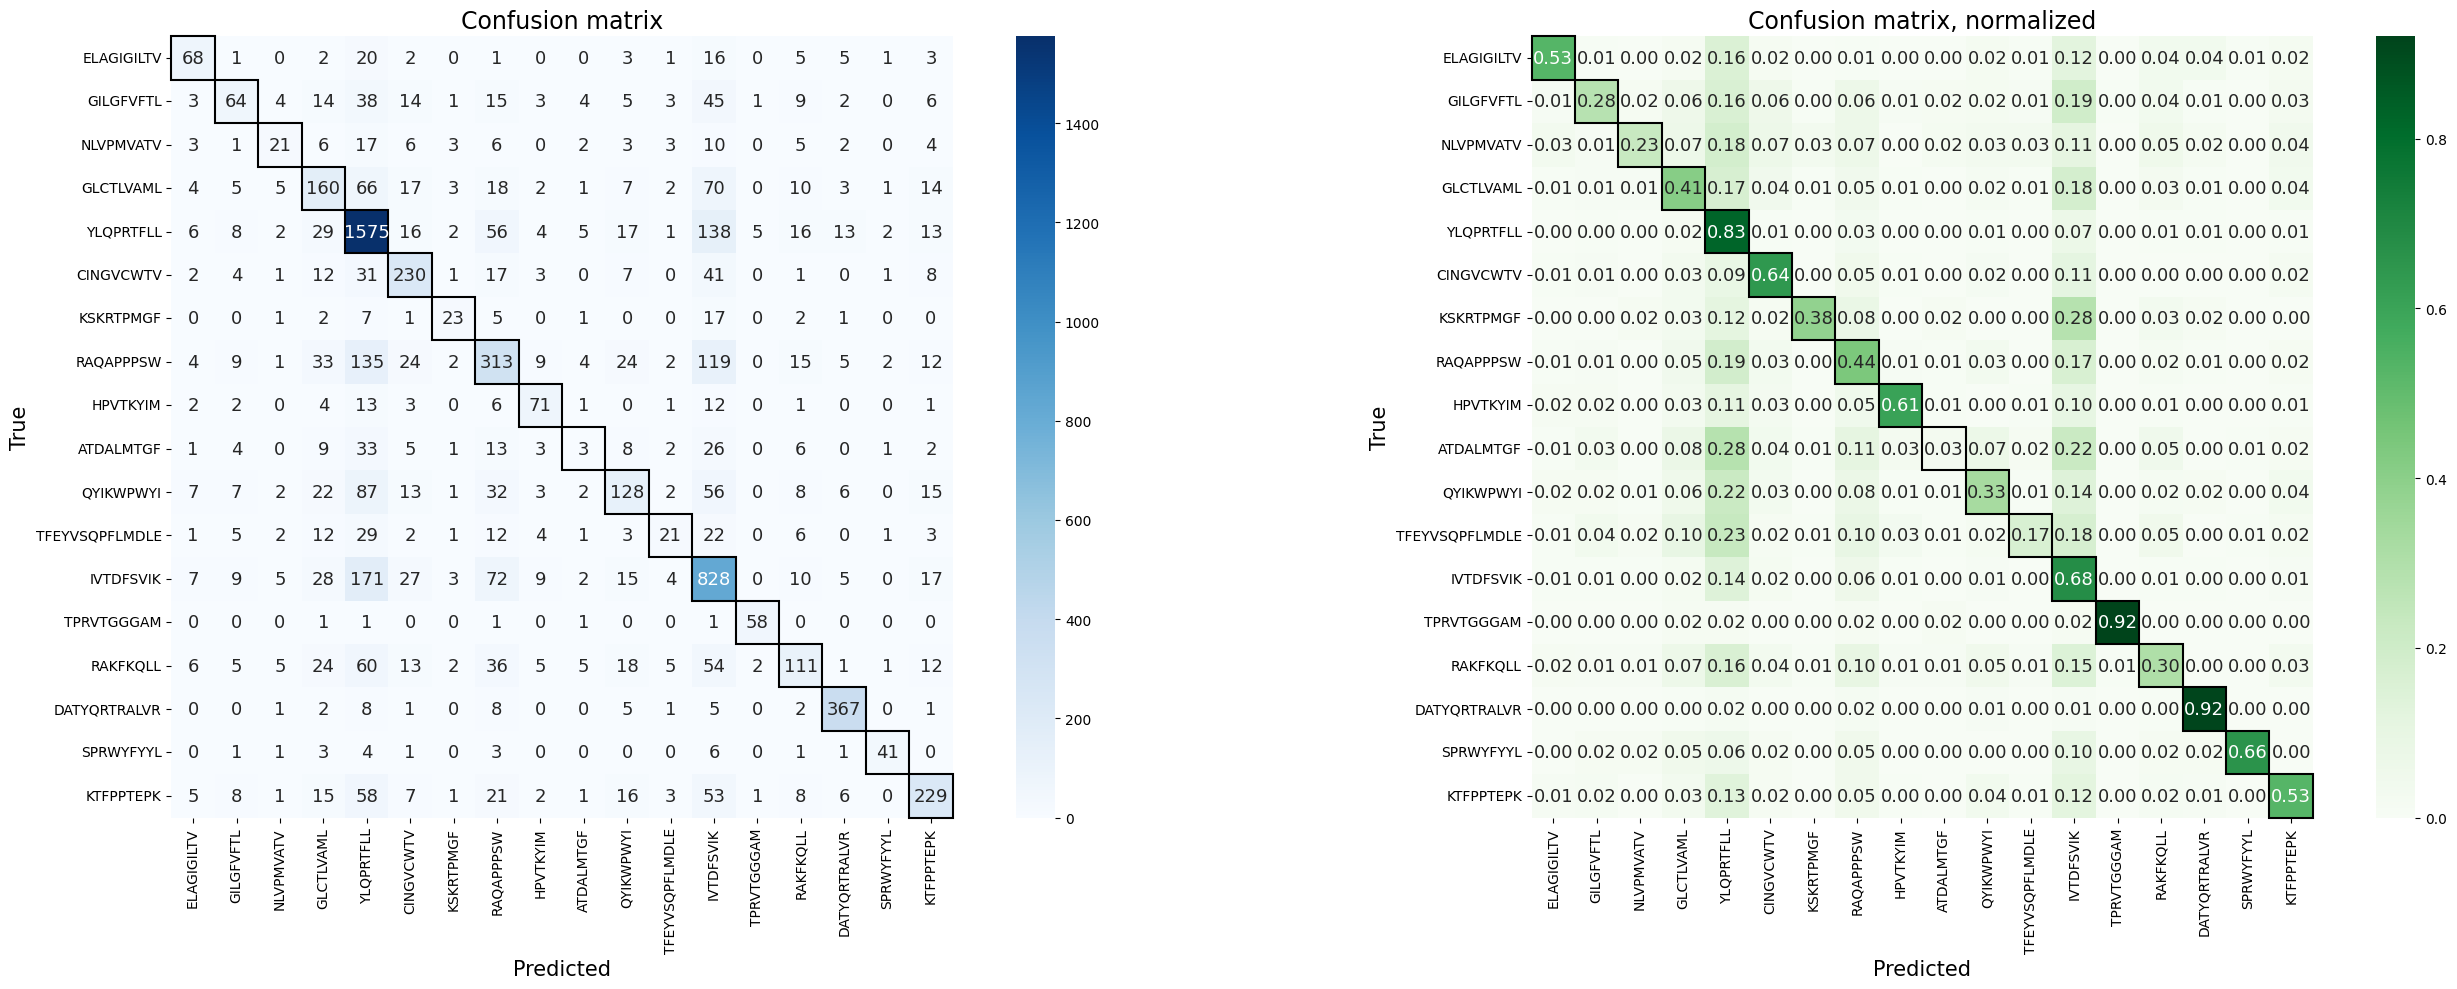

In [20]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28,10))
sns.set_context(font_scale=1.3)
sns.heatmap(conf_mat_dash, annot=True, cmap='Blues', fmt='', ax=axes[0], square=True, annot_kws={"size": 13}, vmin=0)
axes[0].set_xlabel('Predicted', fontsize=15)
axes[0].set_ylabel('True', fontsize=15)
axes[0].set_title('Confusion matrix', fontsize=17)

sns.heatmap(conf_mat_dash_norm, annot=True, cmap='Greens', fmt='.2f', ax=axes[1], square=True, annot_kws={"size": 13}, vmin=0)
axes[1].set_title('Confusion matrix, normalized', fontsize=17)
axes[1].set_xlabel('Predicted', fontsize=15)
axes[1].set_ylabel('True', fontsize=15)

for epi_ind in range(conf_mat_dash.shape[0]):
    axes[0].add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))
    axes[1].add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))

plt.tight_layout()

二分类

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np

In [26]:
# 确保 Y 是二元化的（每个类一个标签）
Y_binarized = label_binarize(Y, classes=np.unique(Y))

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = []
results_df = pd.DataFrame(columns=['True_Label', 'Predicted_Label'])
# 执行交叉验证
for train_ind, test_ind in kfolds.split(X, Y):
    X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
    Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]

    # 使用 OneVsRestClassifier 包装 KNeighborsClassifier
    model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, metric='precomputed', weights='distance'))
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # 将这一轮的真实标签和预测标签存储起来
    round_results = pd.DataFrame({
        'True_Label': Y_test,
        'Predicted_Label': Y_pred
    }, index=test_ind)  # 使用原始数据的索引作为新 DataFrame 的索引

    # 将这一轮的结果添加到总结果 DataFrame 中
    results_df = pd.concat([results_df, round_results])

    # 获取预测和概率
    preds_labels = model.predict(X_test)
    preds_prob = model.predict_proba(X_test)

    # 计算性能指标
    # 对于多标签问题，可能需要调整这些指标的计算方法
    auc = roc_auc_score(Y_test, preds_prob, average="macro", multi_class="ovr")
    accuracy = accuracy_score(Y_test, preds_labels)
    recall = recall_score(Y_test, preds_labels, average='macro')
    precision = precision_score(Y_test, preds_labels, average='macro')
    
    metrics.append({'AUC': auc, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print(results_df)

        AUC  Accuracy    Recall  Precision
0  0.817707  0.613668  0.521255   0.614046
1  0.793351  0.594142  0.470074   0.518931
2  0.787937  0.596650  0.483526   0.560042
3  0.801043  0.616190  0.511303   0.577945
4  0.776884  0.596650  0.477644   0.556250
          True_Label Predicted_Label
1         ELAGIGILTV       GILGFVFTL
3         ELAGIGILTV       GILGFVFTL
7         ELAGIGILTV       GILGFVFTL
13        ELAGIGILTV        RAKFKQLL
16        ELAGIGILTV       IVTDFSVIK
...              ...             ...
7144  TFEYVSQPFLMDLE  TFEYVSQPFLMDLE
7148  TFEYVSQPFLMDLE  TFEYVSQPFLMDLE
7154  TFEYVSQPFLMDLE  TFEYVSQPFLMDLE
7158  TFEYVSQPFLMDLE       GILGFVFTL
7162  TFEYVSQPFLMDLE  TFEYVSQPFLMDLE

[7167 rows x 2 columns]
